## CENSUS INCOME PROJECT

### PROBLEM STATEMENT

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None) # to see all the rows
pd.set_option('display.max_columns', None) # to see all the columns

## Importing and exploring the dataset

In [2]:
census=pd.read_csv('cenus.csv')
census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Above are first five rows of the dataset.

In [4]:
census.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


These are bottom five rows of the dataset.

In [5]:
census.shape

(32560, 15)

This dataset has 32560 rows and 15 attributes

In [6]:
census.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

After having an overview we could conclude this dataset has 9 categorical columns and 6 continous columns.

In [7]:
census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

##### We can see there are no null values in the dataset, but while having an overview in excel we could see '?' in may of the cells.We will check where and in which columns these '?' are present.

In [8]:
census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##### There are no null values or special character in above continous type columns.

In [9]:
CN=census.columns
CN

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [10]:
CN=['Workclass', 'Education','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Native_country','Income']
CN

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

##### For loop to find the categories in the below above mentioned columns.

In [11]:
for i in CN:
    print(i,'\n',census[i].unique(),'\n\n')
    

Workclass 
 [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 


Education 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 


Marital_status 
 [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed'] 


Occupation 
 [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv'] 


Relationship 
 [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 


Race 
 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 


Sex 
 [' Male' ' Female'] 


Native_country 
 [' United

With this we can understand Native_country,Occupation and workclass has the special charcter '?' in them.

##### For loop for finding the count of special character in columns.

In [12]:
for feature in CN:
    print(feature,'\n',census[feature].value_counts(),'\n\n')

Workclass 
  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 


Education 
  HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64 


Marital_status 
  Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64 


Occupation 
  Prof-s

Worksclass have 1836 special characters

Occupation have 1843 special characters.

Native_country have 583 special characters.

Also we come to know there is data imbalance in our label column : Income.

##### We will will replace the ? in workclass column with the mode value.

In [13]:
census['Workclass'].replace(' ?',' Private',inplace=True)

In [14]:
census.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [15]:
census.Workclass.value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

##### We will will replace the ? in Occupation column with the mode value

In [16]:
census['Occupation'].replace(' ?',' Prof-specialty',inplace=True)

In [17]:
census.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [18]:
census.Occupation.value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

##### We will will replace the ? in Native_country column with the mode value

In [19]:
census['Native_country'].replace(' ?',' United-States',inplace=True)

In [20]:
census.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [21]:
census.Native_country.value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

##### Now we have replaced all the special characters from the dataset.

In [22]:
census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observation:
    
1)There is possiblity of outliers in Age column as there is huge difference between 75% and max column.

2)There no major difference between mean and mode of the age ,fnlwght,Education_num and hours per week columns.

3)Outliers are present in Capital_gain and Capital_loss.

In [23]:
census.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

## Exploratory Data Analysis

### Univariate Analysis

In [24]:
census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

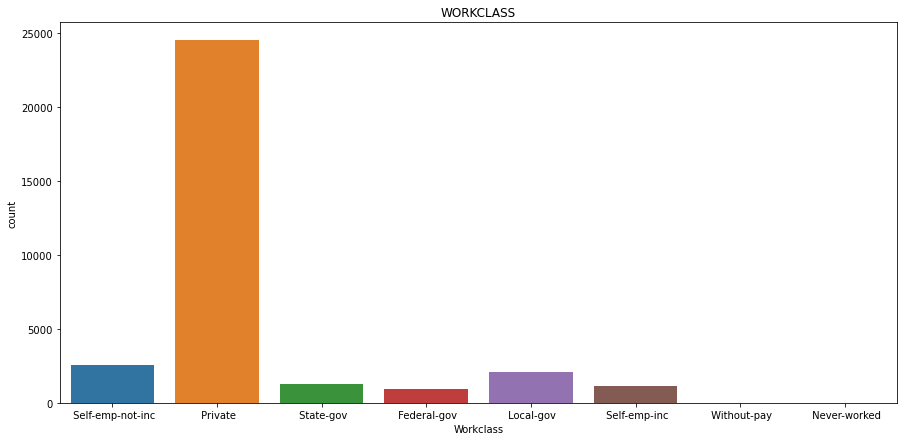

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(census['Workclass'])
plt.title('WORKCLASS')
plt.show()

Observation:
    
1)People working in private sector are more in numbers.

2)After private sector , Self emp not inc and local gov sector are most in this dataset.

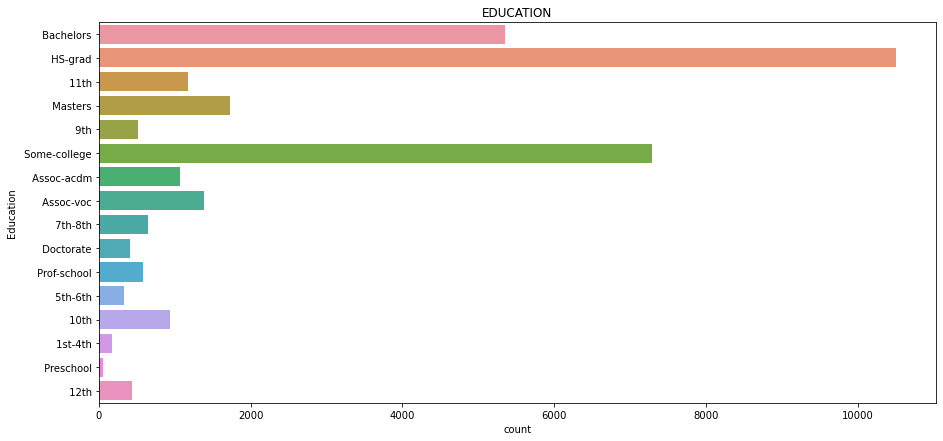

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(y=census['Education'])
plt.title('EDUCATION')
plt.show()

Observation:
    
1)HS-grad people are ranging more than 10000 and are highest.

2)There are almost 8000 people passed from some college.

3)Rest all educated people categories have less than 2000 people.

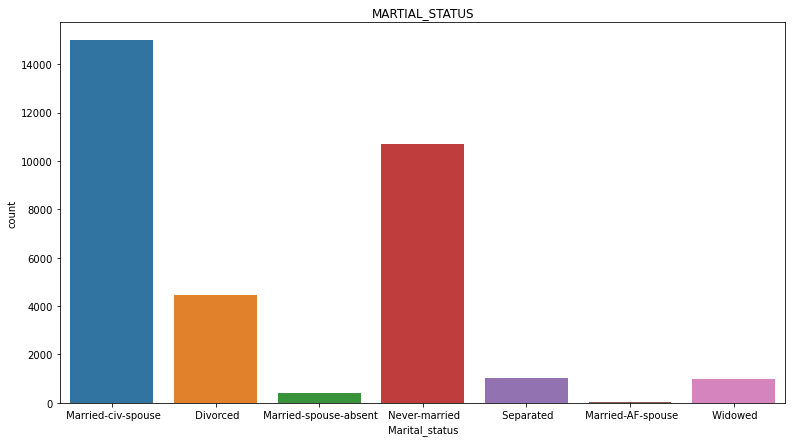

In [27]:
plt.figure(figsize=(13,7))
sns.countplot(census['Marital_status'])
plt.title('MARTIAL_STATUS')
plt.show()

Observations:
    
1)Married-civ-spouse are more than 14000.

2)Never married are around 10000 people.

3)Divorced are around 4000.

4)Rest all categories are aprox around 1000.

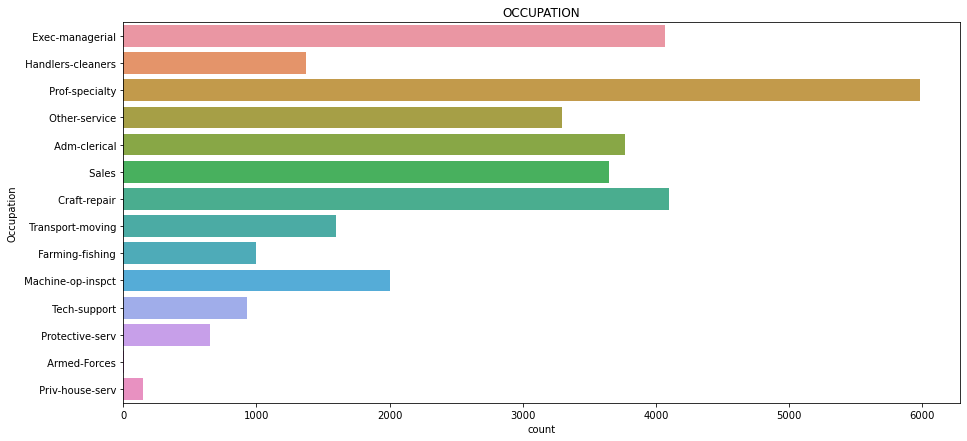

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(y=census['Occupation'])
plt.title('OCCUPATION')
plt.show()

Observation:
    
1)Approx 6000 people have occupation as Prof.speciality.

2)People with occupation of Exec-managerical and craft repair are around 4000.

3)least people are in Armed forces.

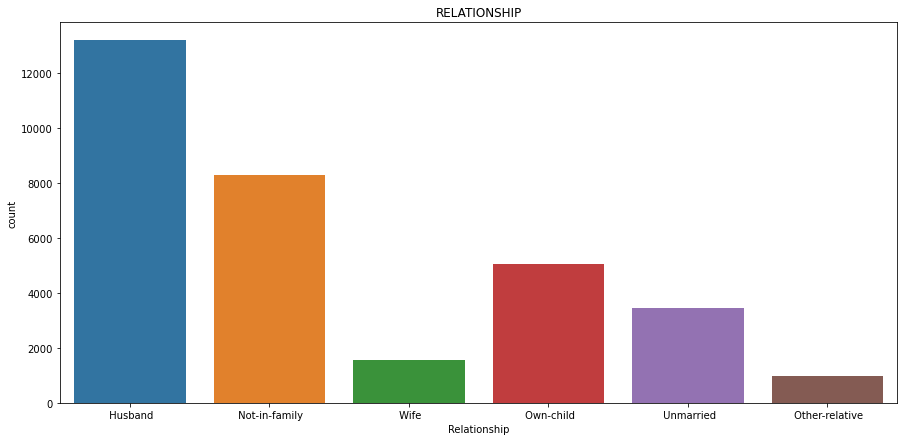

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(x=census['Relationship'])
plt.title('RELATIONSHIP')
plt.show()

Observation:
    
1)There are more than 12000 husbands.

2)Approx. 8000 people are not in family.

3)Least are wife and other-relative.

4)Unmarried are approx 4000 .



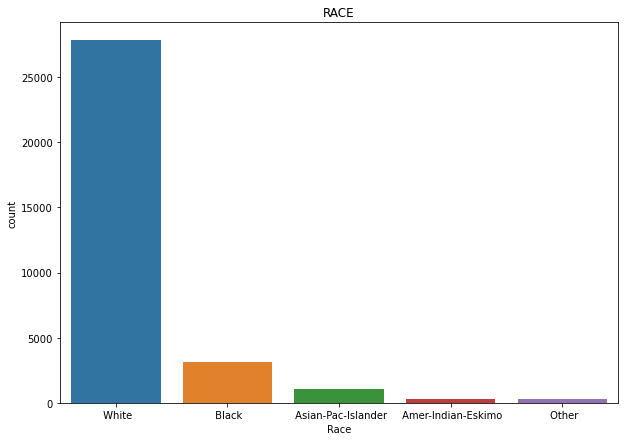

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(census['Race'])
plt.title('RACE')
plt.show()

Observation:
    
1)More than 25000 are white people in dataset.

2)Black people are approx 3000.

3)Asian-pac-islander and Amer-indian-eskimo are comparitively very less in dataset.

4)Other race people are least.

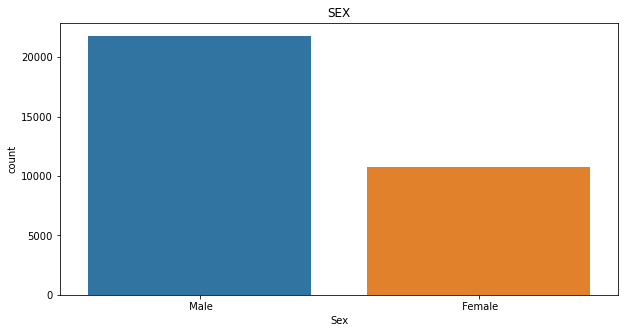

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(census['Sex'])
plt.title('SEX')
plt.show()

Observation:
    
1)There are more than 20000 Males and approx 11000 females in the dataset.

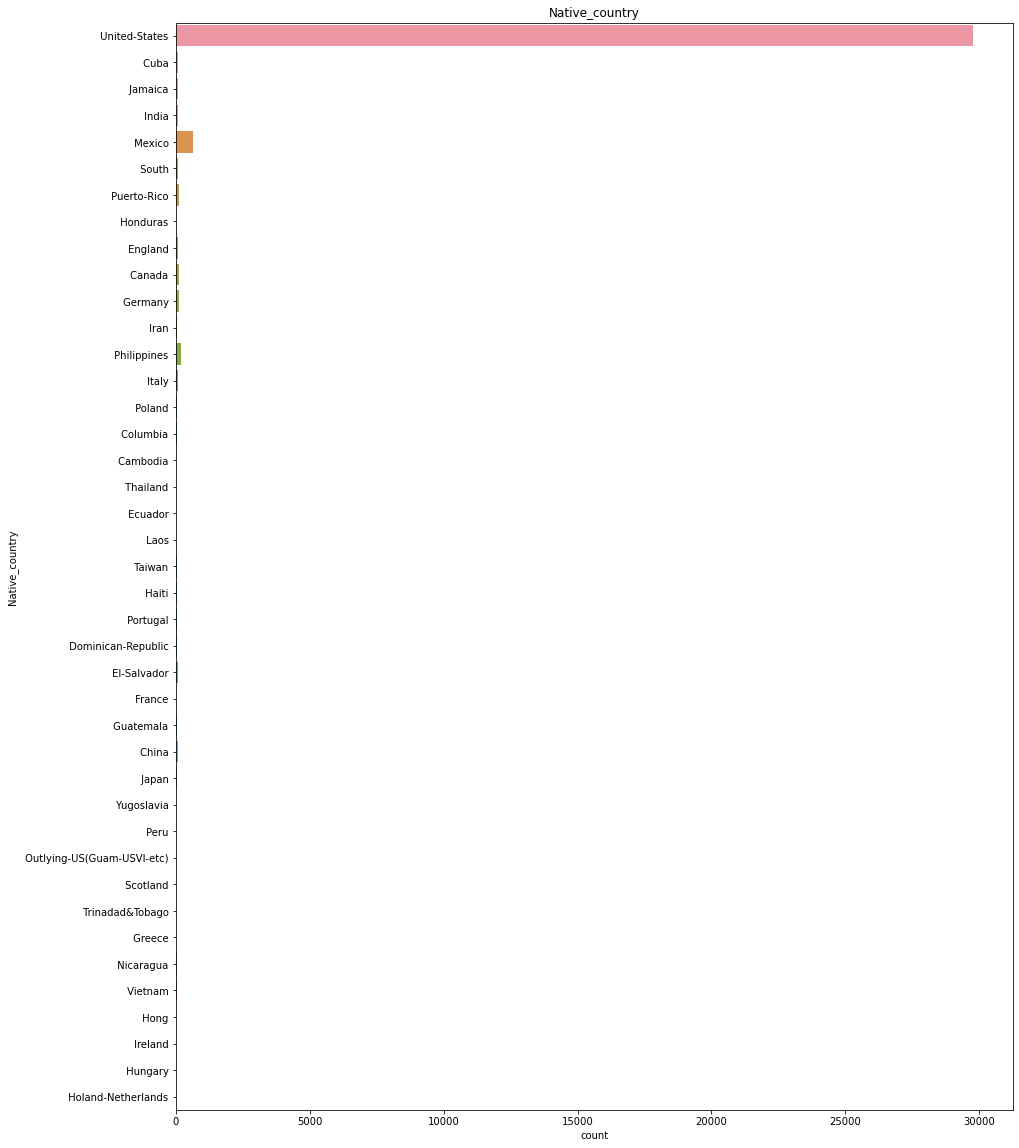

In [32]:
plt.figure(figsize=(15,20))
sns.countplot(y=census['Native_country'])
plt.title('Native_country')
plt.show()

Observation:
    
1)From 32560 people in the data set approx. 29000 people are from United states ,which is close to 90% of population.

2)There are approx 1000 people from mexico.

3)There are negligible people from other Native_country.

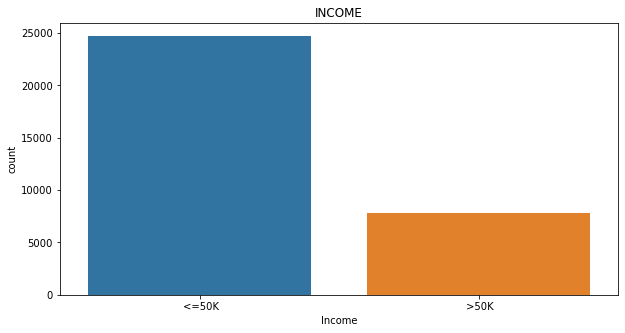

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(census['Income'])
plt.title('INCOME')
plt.show()

Observation:
    
1)This is our lable column and close to 25000 people are with <=50k income.

2)Approx. 8000 people have income >50k.

<AxesSubplot:xlabel='Capital_gain'>

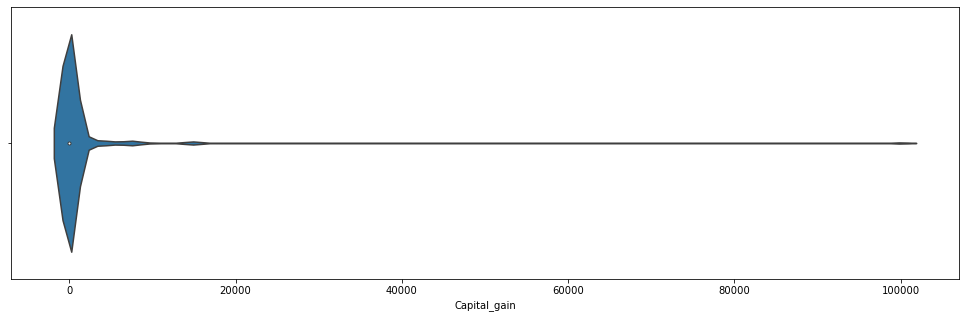

In [34]:
plt.figure(figsize=(17,5))
sns.violinplot(census['Capital_gain'])

Observation :
    
1)There majority of people with capital_gain from 0 to 5000.     

<AxesSubplot:xlabel='Capital_loss'>

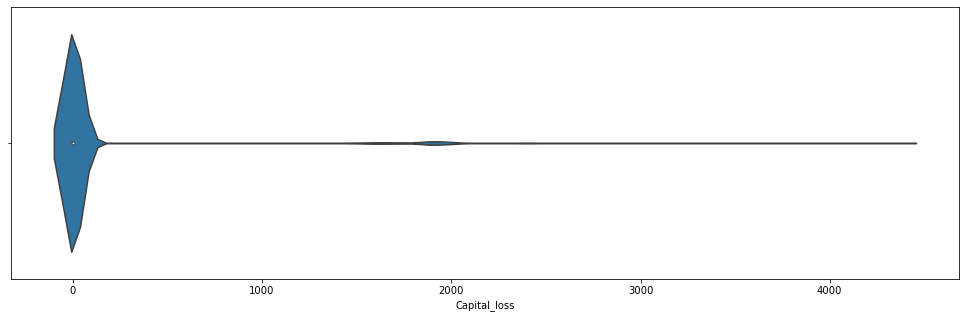

In [35]:
plt.figure(figsize=(17,5))
sns.violinplot(census['Capital_loss'])

Observation:

1)Most of people are with captial_loss same as capital_gain.    

<AxesSubplot:xlabel='Hours_per_week'>

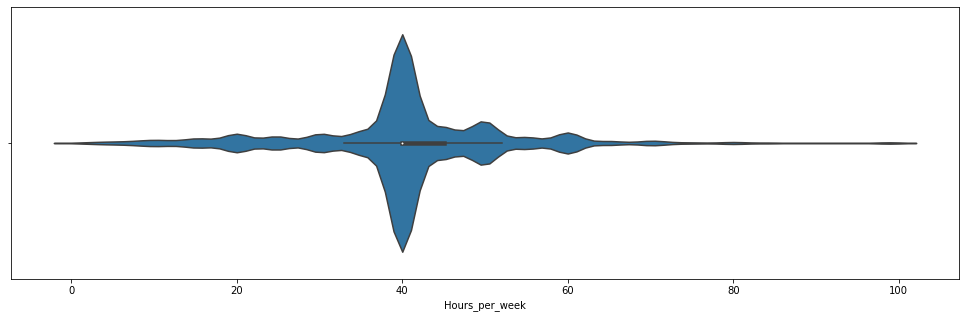

In [36]:
plt.figure(figsize=(17,5))
sns.violinplot(census['Hours_per_week'])

Obseravtion:
    
Majority of people have working hours ranging from 35 hours to 45 hours.    

### Bivariate Analysis

In [37]:
census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

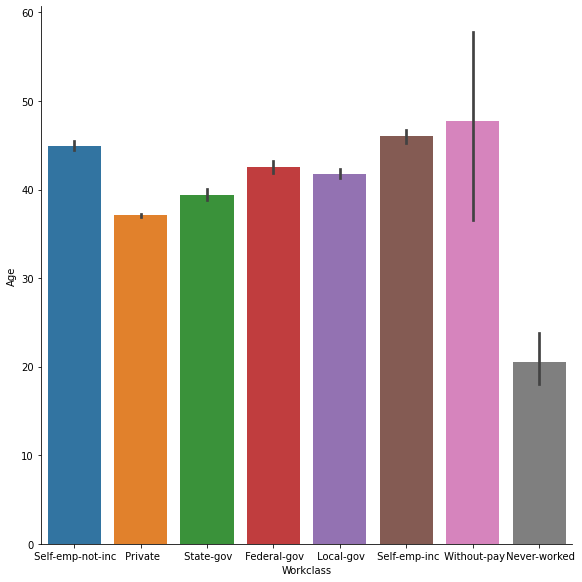

In [38]:
sns.catplot(y='Age',x='Workclass',data=census,kind='bar',size=8)
plt.show()

Observation:
    
1)People who have never worked are in their 20's.

2)Most elderly people in dataset are without pay.

3)Self emp not inc and self emp inc are of almost same age.

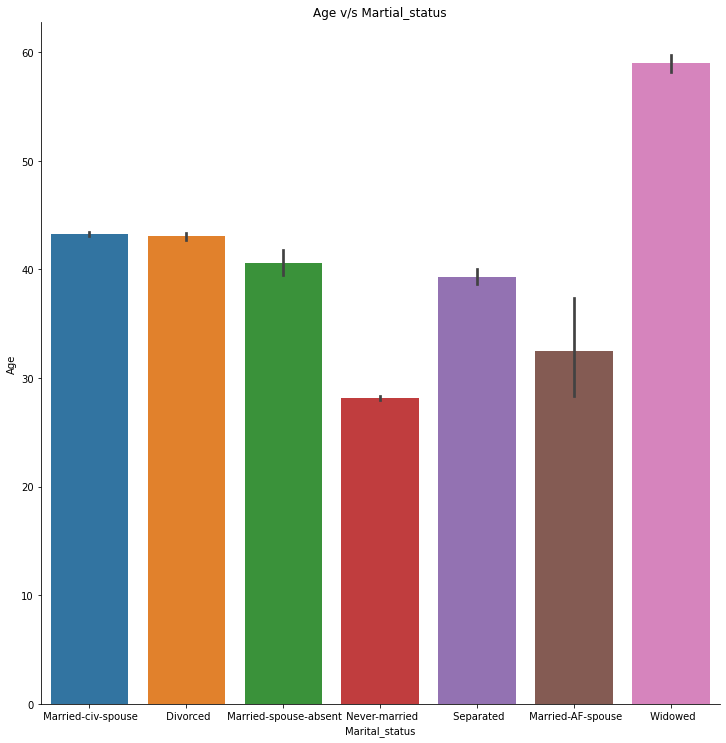

In [39]:
sns.catplot(y='Age',x='Marital_status',data=census,kind='bar',size=10)
plt.title('Age v/s Martial_status')
plt.show()

Observation:
    
1)Age of widowed is the highest compared to other peoples.

2)Married civ spouse and divorced are ranging with same age.

3)Never married are the youngest in all people.

4)Seprated are of almost same age to divorced .

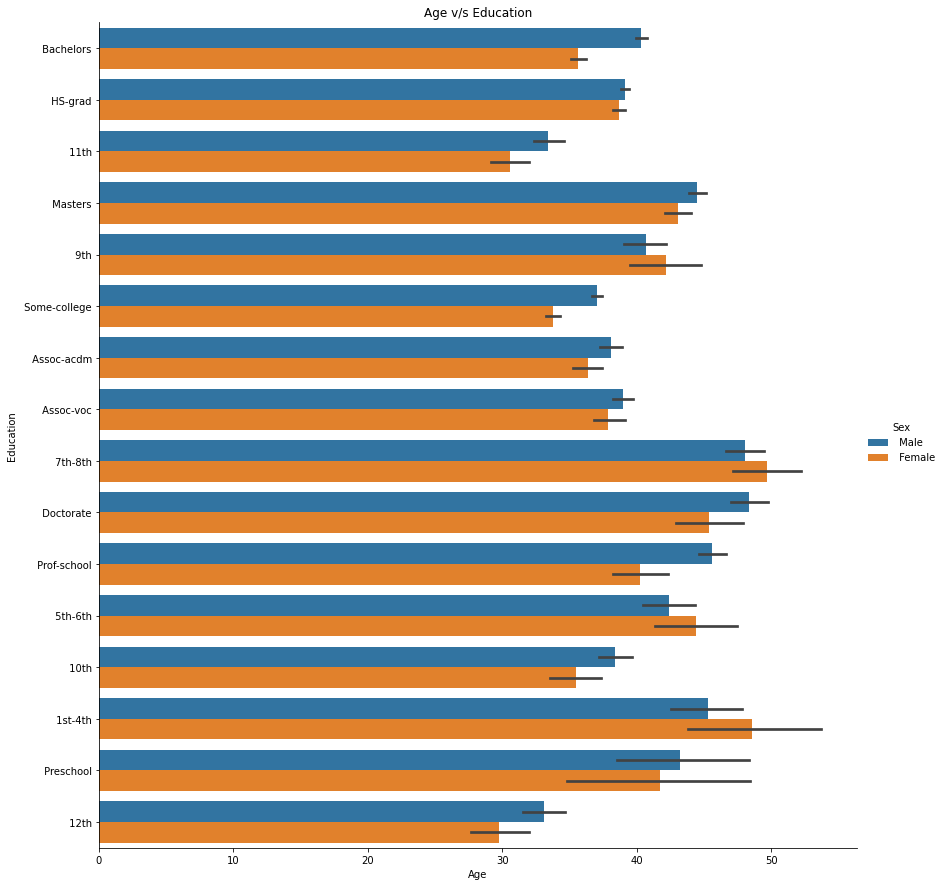

In [40]:
sns.catplot(x='Age',y='Education',hue='Sex',data=census,kind='bar',size=12)
plt.title('Age v/s Education')
plt.show()

Observation:
    
1)People educated from  7th-8th are  senior most.Age of female is more in people educted from 7th-8th.

2)Age of females is more than males with education 1st-4th,5th-6th,9th.We can conclude the age of feamles is higher with higher secondary education.

3)Males are elder than female with education background of bachelors,master,some-college,prof school.

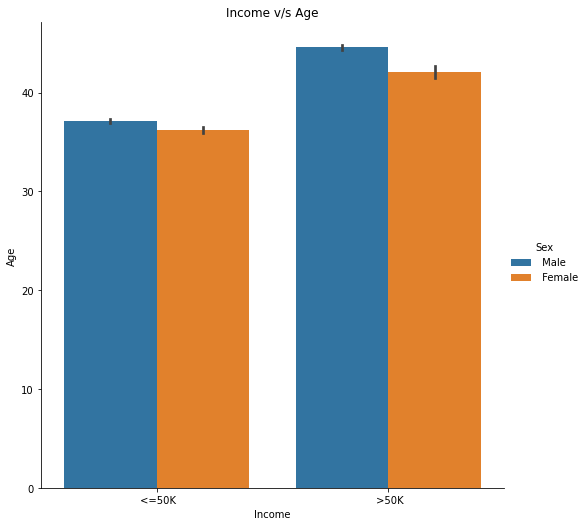

In [41]:
sns.catplot(x='Income',y='Age',hue='Sex',data=census,kind='bar',size=7)
plt.title('Income v/s Age')
plt.show()

Observation:
    
1)Males and females are in their late 30's with income <=50k.

2)Males and females are in their mid 40's with income >50k.

3)Males have been elder in both the <=50k and >50k income case.

<Figure size 1440x720 with 0 Axes>

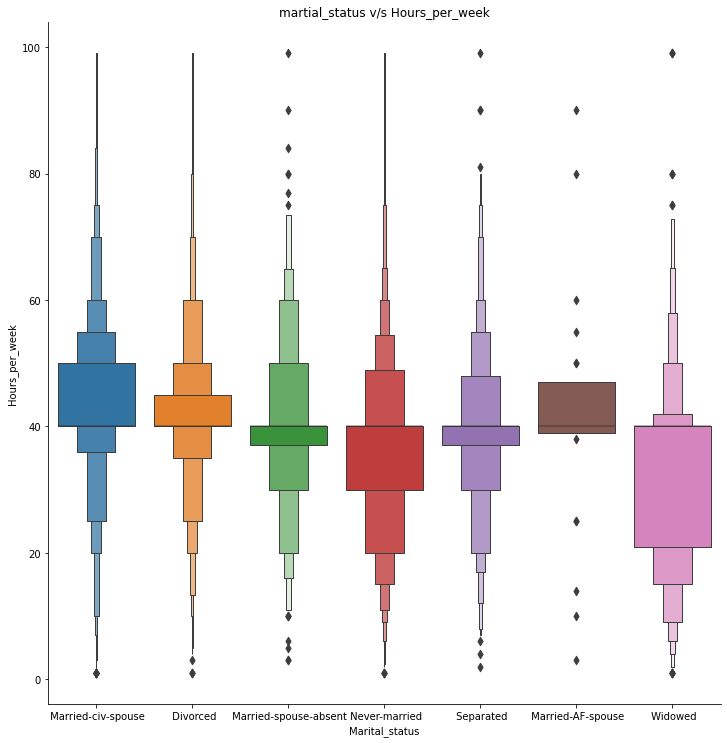

In [42]:
plt.figure(figsize=(20,10))
sns.catplot(x='Marital_status',y='Hours_per_week',data=census,kind='boxen',size=10)
plt.title('martial_status v/s Hours_per_week')
plt.show()

Observation:
    
1)Married-civ-spouse tend to have more working hours per week from 40 to 50 hours also few cases upto 90 hrs.

2)Working hours of widowed are least from 20 to 40 hrs.

3)Married AF spouse have fixed working hours 40 to 45 hours.

4)Working hours of married spouse absent and divorced is very similar.

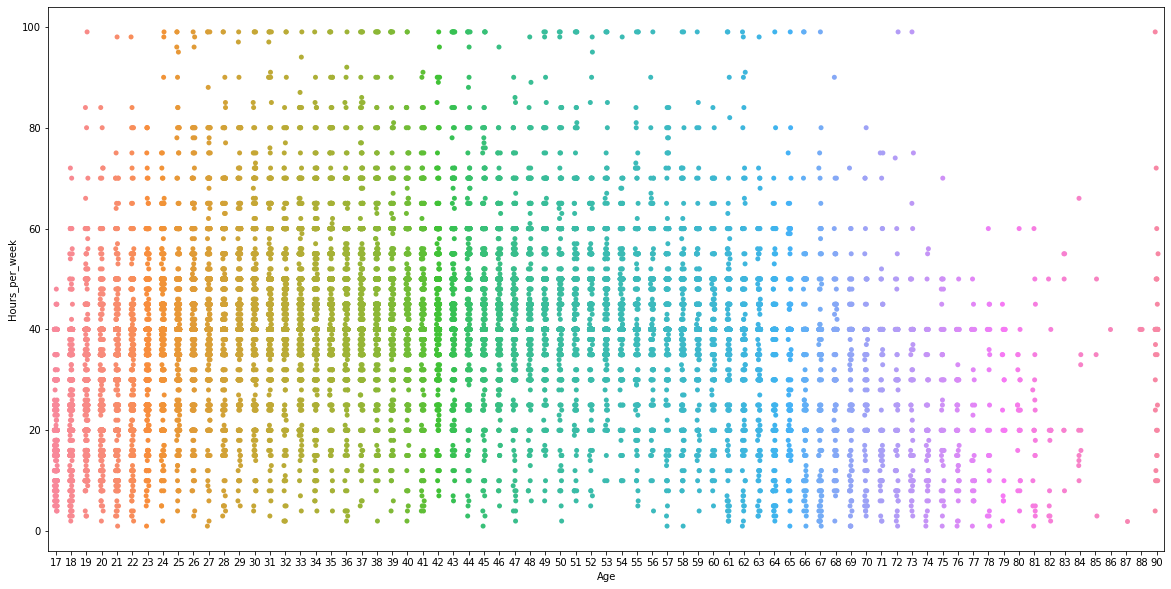

In [43]:
plt.figure(figsize=(20,10))
sns.stripplot(y='Hours_per_week',x='Age',data=census)
plt.show()

Observation:
    
1)Age and Hours_per_week tend to have no relation with each other.    

2)Working hours per week is lesser in youngsters and elders. 

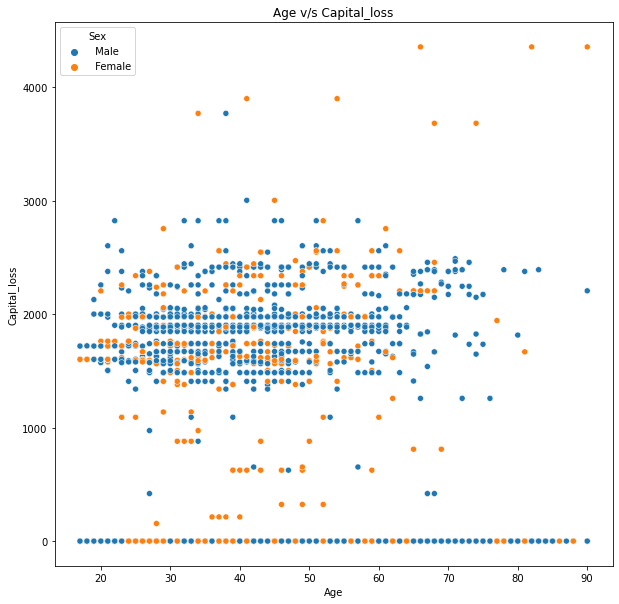

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Age',y='Capital_loss',data=census,hue='Sex')
plt.title('Age v/s Capital_loss')
plt.show()

Observation:
    
1)Capital_loss and Age are not correlated to each other.

2)We can find more males with capital_loss.

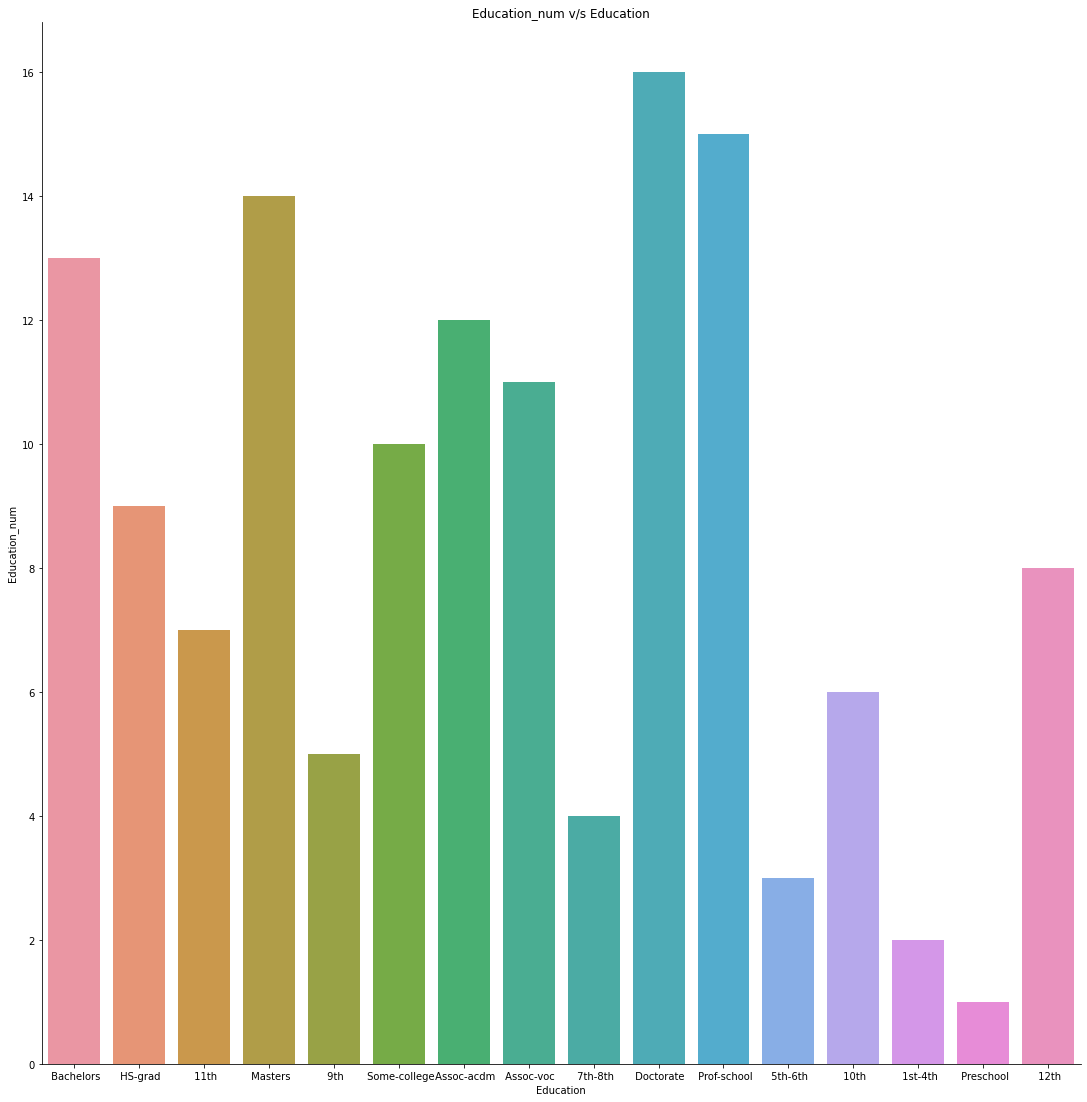

In [45]:
sns.catplot(y='Education_num',x='Education',data=census,kind='bar',size=15)
plt.title('Education_num v/s Education')
plt.show()

Observation:
    
1) We can understand Education_num and education is directly related and are as per the qualfifcation standards.

Preschool=1,
1st-4th=2,
5th-6th=3,
7th-8th=4,
9th=5,
10th=6,
11th=7,
12th=8,
Hs-Grad=9,
Some-college=10
 and so on till doctorate .
    

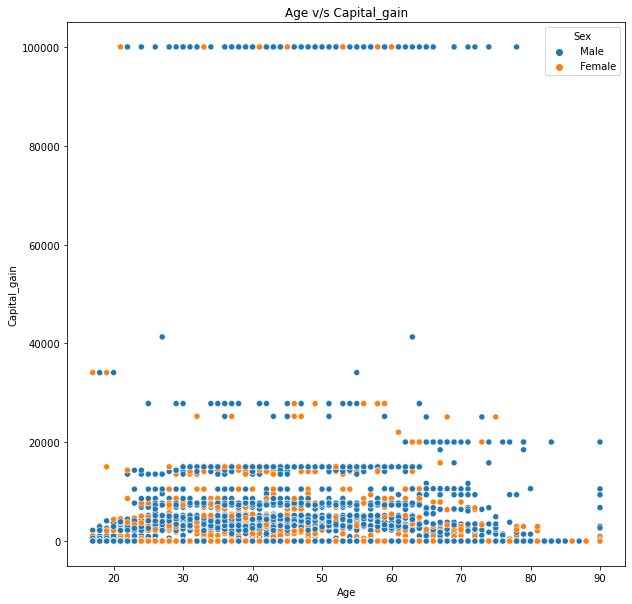

In [46]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Age',y='Capital_gain',data=census,hue='Sex')
plt.title('Age v/s Capital_gain')
plt.show()

Observation:

1)Capital_gain and Age are not correlated to each other.

2)We can find more males with capital_gain.

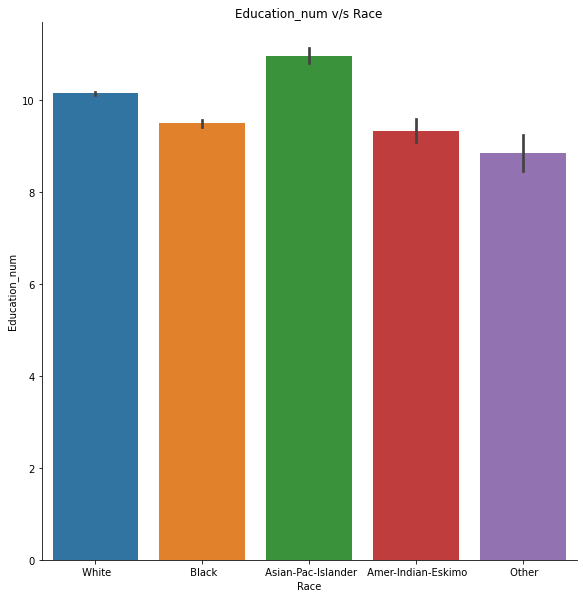

In [47]:
sns.catplot(y='Education_num',x='Race',data=census,kind='bar',size=8)
plt.title('Education_num v/s Race')
plt.show()

Observation:
    
1)Asian Pac Islander are highest qualified.

2)White people are next to Asian Pac Islander in qualification.

3)Black and Amer Indian Eskimo are mostly equaly qualified.

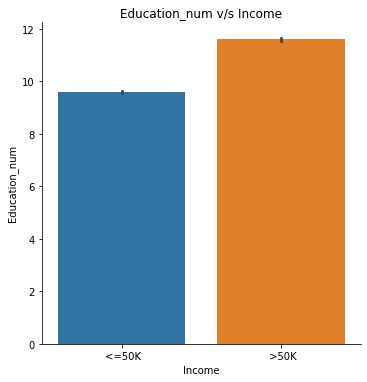

In [48]:
sns.catplot(y='Education_num',x='Income',data=census,kind='bar',size=5)
plt.title('Education_num v/s Income')
plt.show()

Observation:
    
1)More qualififed people have income  >50k.

2)Income is <=50k of lesser people qualified.

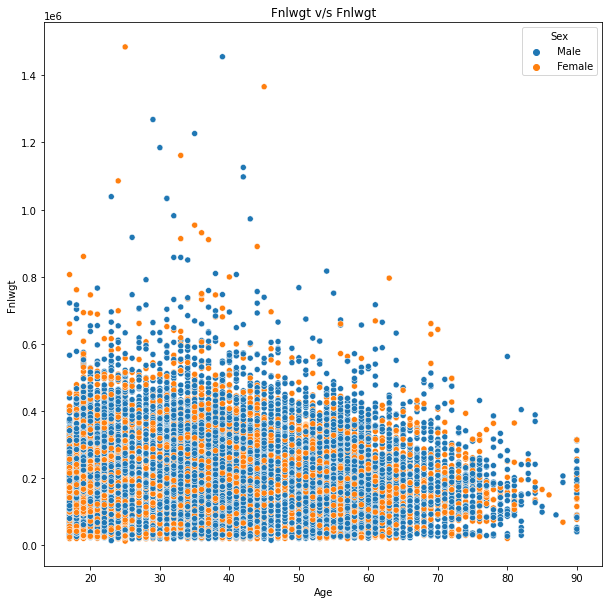

In [49]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='Fnlwgt',x='Age',data=census,hue='Sex')
plt.title('Fnlwgt v/s Fnlwgt')
plt.show()

Observation:
    
1)Age and Fmlwght is uniformly distributed.    

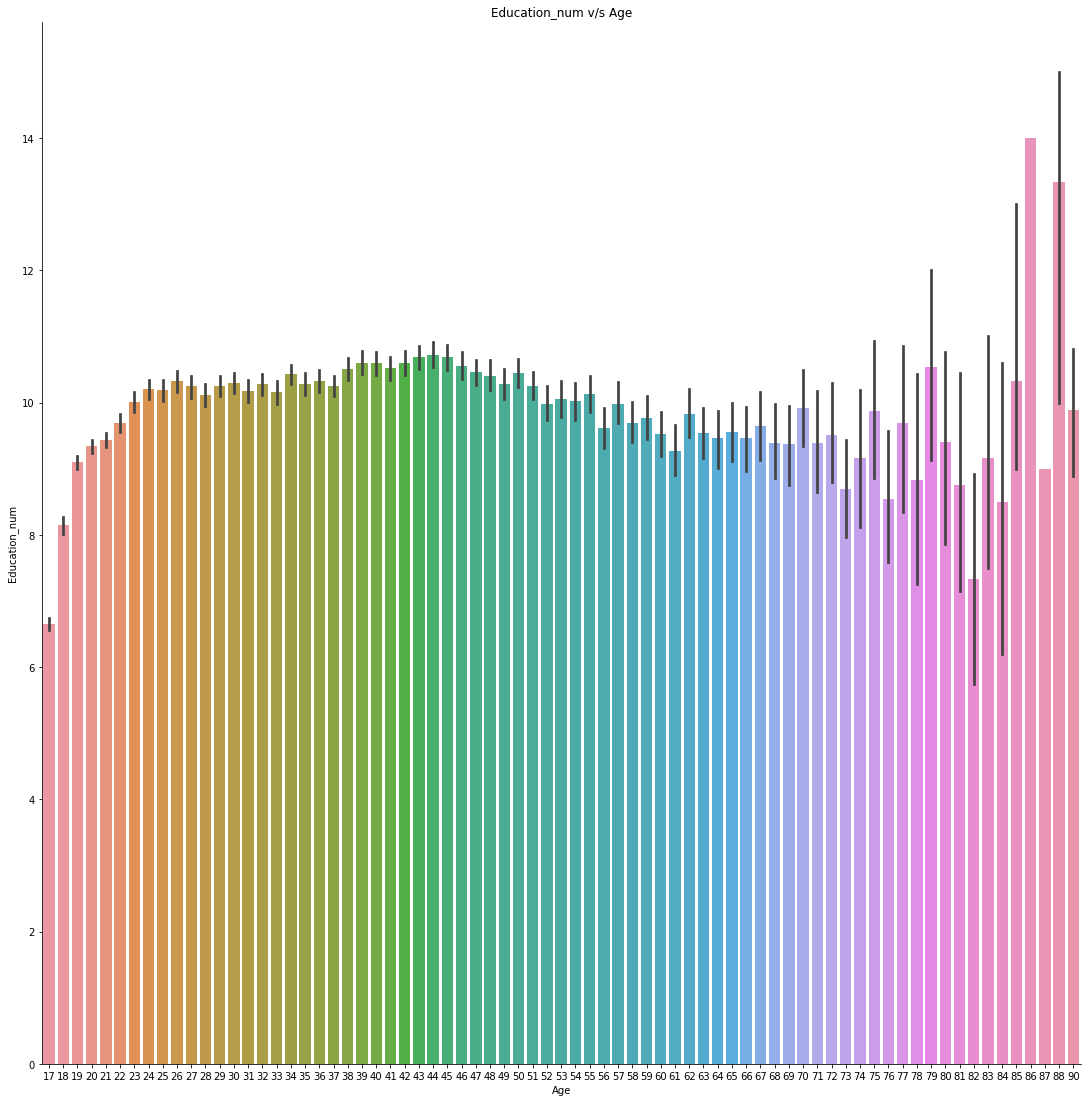

In [50]:
sns.catplot(y='Education_num',x='Age',data=census,kind='bar',size=15)
plt.title('Education_num v/s Age')
plt.show()

Observation:
    
1)There is steep rise in qualification of people from 17 to 27 years.

2)People from age 38 to 47 have heighest qualification.

3)Qualification decreases in elderly people .

4)Elders in late 80s have very high qualification.

### Multivariate Analysis

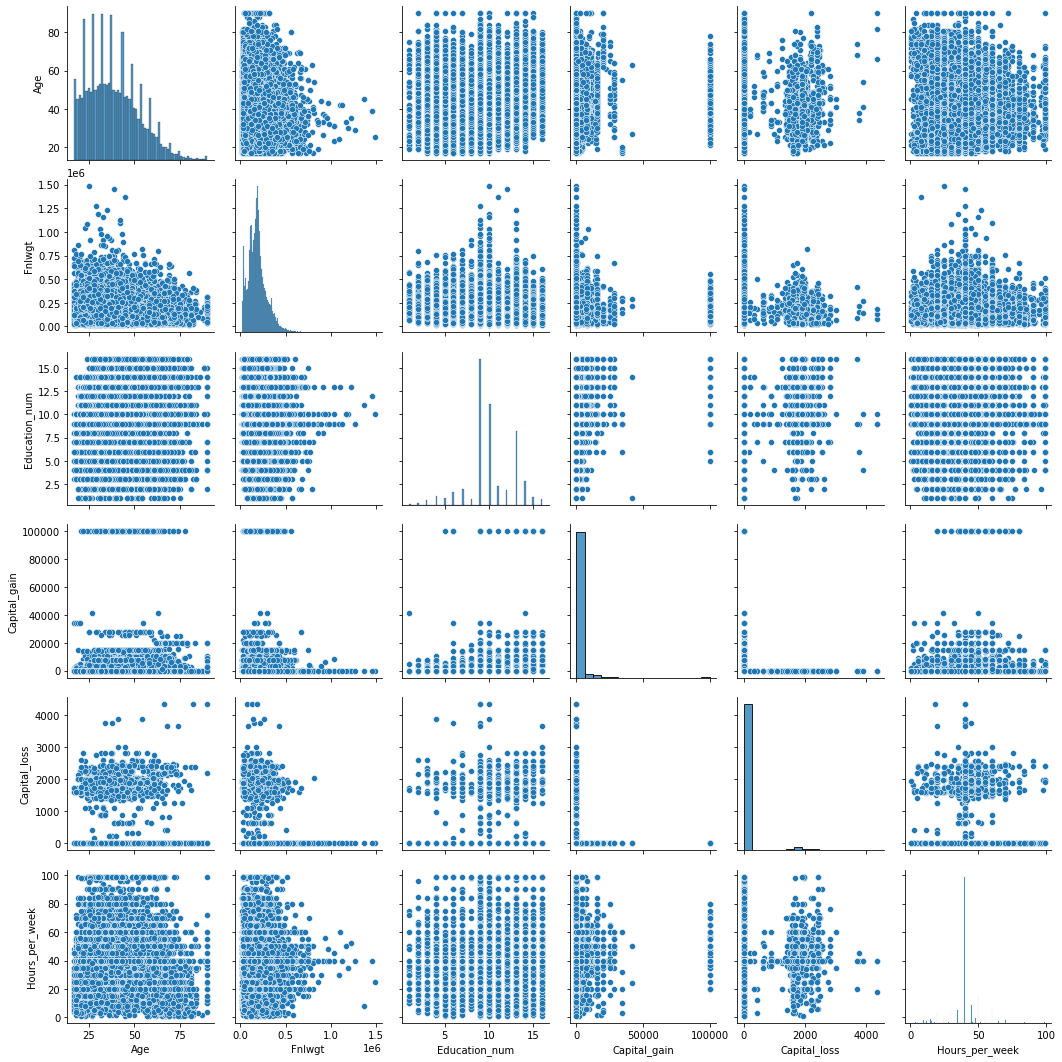

In [51]:
sns.pairplot(census)

## Encoding

In [52]:
census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

##### We will apply One hot encoder on sex and income columns.

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
OHC=OneHotEncoder(handle_unknown='ignore', sparse=False)

In [55]:
census = pd.get_dummies(data=census, columns=['Sex'])

In marital_status coulmn we saw catergories like 

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
    
in which divorced and seprated means same,widowed and Married spouse absent means same .So we will combine these categories.    

In [56]:
census['Marital_status']=census['Marital_status'].replace(' Separated','Divorced')

In [57]:
census['Marital_status']=census['Marital_status'].replace('Divorced',' Divorced')

In [58]:
census['Marital_status'].replace(' Married-spouse-absent',' Widowed',inplace=True)

In [59]:
census.Marital_status.unique()

array([' Married-civ-spouse', ' Divorced', ' Widowed', ' Never-married',
       ' Married-AF-spouse'], dtype=object)

##### Now we have 5 categories in Martial_status column

Apply ordinal encoder for workclass,Education,Occupation,Relationship

In [60]:
census.Race.value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

As we can see from above race column has 90 % of white community hence will consider other all 4 communities as one class to avoid extra categories.

In [61]:
census.Race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [62]:
census['Race'].replace(' Other',' Amer-Indian-Eskimo',inplace=True)

In [63]:
census['Race'].replace(' Amer-Indian-Eskimo',' Asian-Pac-Islander',inplace=True)

In [64]:
census.Race.value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1621
Name: Race, dtype: int64

##### Now we have only three categories in Race column

In [65]:
census.Native_country.value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

#### We will call Ordinal Encoder

In [66]:
from sklearn.preprocessing import OrdinalEncoder

In [67]:
OE=OrdinalEncoder()

In [68]:
census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income',
       'Sex_ Female', 'Sex_ Male'],
      dtype='object')

In [69]:
cols=['Workclass','Education','Marital_status', 'Occupation', 'Relationship', 'Race','Native_country', 'Income']

In [70]:
cols

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Native_country',
 'Income']

In [71]:
for i in cols:
    if census[i].dtypes=='object':
        census[i]=OE.fit_transform(census[i].values.reshape(-1,1))

In [72]:
census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Sex_ Female,Sex_ Male
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,2.0,0,0,13,38.0,0.0,0,1
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,2.0,0,0,40,38.0,0.0,0,1
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,1.0,0,0,40,38.0,0.0,0,1
3,28,3.0,338409,9.0,13,2.0,9.0,5.0,1.0,0,0,40,4.0,0.0,1,0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,2.0,0,0,40,38.0,0.0,1,0


Now all our categorical columns are converted from character to numeric.

## Correlation

In [73]:
census.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Sex_ Female,Sex_ Male
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.229889,0.001740,-0.263698,0.035229,0.077674,0.057775,0.068756,-0.000271,0.234039,-0.088832,0.088832
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.001004,0.007236,-0.057931,0.041362,0.031496,0.002662,0.042206,-0.001646,0.002739,-0.071535,0.071535
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.008878,0.000138,0.008922,-0.010631,0.000437,-0.010259,-0.018770,-0.063279,-0.009481,-0.026882,0.026882
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.028831,-0.041297,-0.010879,0.017750,0.030047,0.016744,0.055510,0.076062,0.079311,0.027349,-0.027349
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.020030,0.071012,-0.094145,0.027749,0.122627,0.079932,0.148127,0.088887,0.335182,-0.012256,0.012256
Marital_status,-0.229889,-0.001004,0.008878,-0.028831,-0.020030,1.000000,0.041491,0.003077,-0.028230,-0.017784,-0.010554,-0.132797,-0.029226,-0.063271,-0.038351,0.038351
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.041491,1.000000,-0.037465,-0.007421,0.018028,0.009670,-0.012881,-0.002205,0.034599,-0.047497,0.047497
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.003077,-0.037465,1.000000,-0.103429,-0.057918,-0.061064,-0.248975,-0.010710,-0.250924,0.582453,-0.582453
Race,0.035229,0.041362,-0.010631,0.017750,0.027749,-0.028230,-0.007421,-0.103429,1.000000,0.008100,0.016657,0.037820,0.162277,0.066901,-0.076904,0.076904
Capital_gain,0.077674,0.031496,0.000437,0.030047,0.122627,-0.017784,0.018028,-0.057918,0.008100,1.000000,-0.031614,0.078409,0.008818,0.223333,-0.048477,0.048477


Above table is for correlation with the columns, we will check heat map for more clear understanding.

##### Heat Map

<AxesSubplot:>

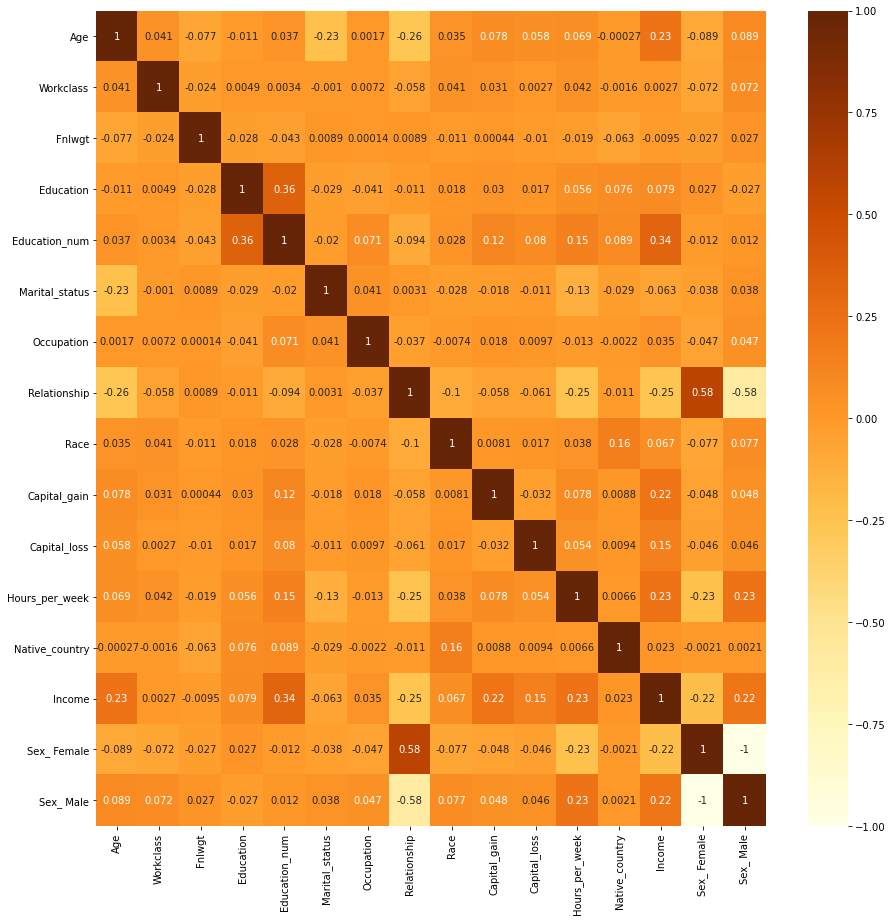

In [74]:
plt.figure(figsize=(15,15))
sns.heatmap(census.corr(),annot=True,cmap='YlOrBr')

Observation:
    
1)Relationship and Sex-Feamle are most correlated columns in the dataset.

2)Education and Education_numa are 2nd most correlated columns in the dataset.

3)Sex_male and female columns are very nehatively correlated with each other.


## Top 10 correlated values

In [75]:
correlation_0=census.corr().abs().unstack().sort_values(kind='quicksort').dropna()
correlation_0

Occupation      Fnlwgt            0.000138
Fnlwgt          Occupation        0.000138
Native_country  Age               0.000271
Age             Native_country    0.000271
Fnlwgt          Capital_gain      0.000437
Capital_gain    Fnlwgt            0.000437
Workclass       Marital_status    0.001004
Marital_status  Workclass         0.001004
Workclass       Native_country    0.001646
Native_country  Workclass         0.001646
Age             Occupation        0.001740
Occupation      Age               0.001740
Native_country  Sex_ Female       0.002055
Sex_ Female     Native_country    0.002055
Native_country  Sex_ Male         0.002055
Sex_ Male       Native_country    0.002055
Occupation      Native_country    0.002205
Native_country  Occupation        0.002205
Capital_loss    Workclass         0.002662
Workclass       Capital_loss      0.002662
                Income            0.002739
Income          Workclass         0.002739
Relationship    Marital_status    0.003077
Marital_sta

In [76]:
correlation_0=correlation_0[correlation_0!=1]
correlation_0

Occupation      Fnlwgt            0.000138
Fnlwgt          Occupation        0.000138
Native_country  Age               0.000271
Age             Native_country    0.000271
Fnlwgt          Capital_gain      0.000437
Capital_gain    Fnlwgt            0.000437
Workclass       Marital_status    0.001004
Marital_status  Workclass         0.001004
Workclass       Native_country    0.001646
Native_country  Workclass         0.001646
Age             Occupation        0.001740
Occupation      Age               0.001740
Native_country  Sex_ Female       0.002055
Sex_ Female     Native_country    0.002055
Native_country  Sex_ Male         0.002055
Sex_ Male       Native_country    0.002055
Occupation      Native_country    0.002205
Native_country  Occupation        0.002205
Capital_loss    Workclass         0.002662
Workclass       Capital_loss      0.002662
                Income            0.002739
Income          Workclass         0.002739
Relationship    Marital_status    0.003077
Marital_sta

In [77]:
correlation_0_Top10=correlation_0.tail(10)
correlation_0_Top10

Relationship   Age              0.263698
Age            Relationship     0.263698
Education_num  Income           0.335182
Income         Education_num    0.335182
Education_num  Education        0.359172
Education      Education_num    0.359172
Relationship   Sex_ Male        0.582453
Sex_ Male      Relationship     0.582453
Relationship   Sex_ Female      0.582453
Sex_ Female    Relationship     0.582453
dtype: float64

Above are top 10 highly correlated columns.

## OUTLIERS

we will check the outliers in columns

In [78]:
ncols,nrows=(2,3)

In [79]:
census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income',
       'Sex_ Female', 'Sex_ Male'],
      dtype='object')

In [80]:
CN=['Age','Fnlwgt','Capital_gain','Capital_loss', 'Hours_per_week']
CN

['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

#### Box Plot

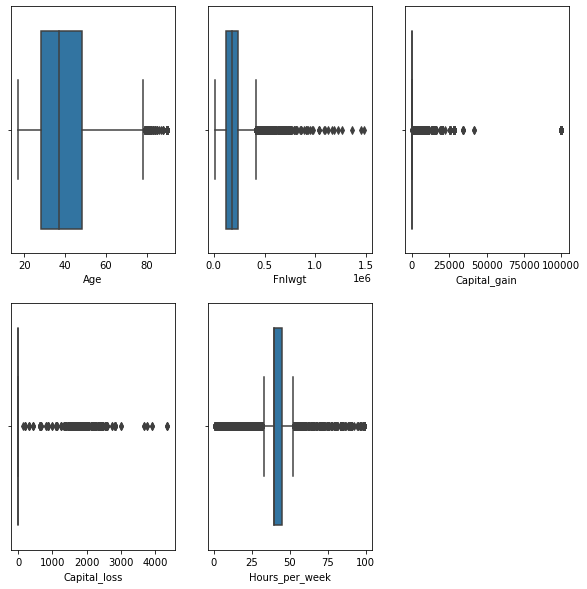

In [81]:
plt.figure(figsize=(10,10))
for index,col in enumerate(CN):
    plt.subplot(ncols,nrows,index+1)
    sns.boxplot(census[CN[index]])

we will drop column fnlwght as after reading problem statement ,as fnlwght is related to the population of people the survey has and poplulation cannot be related to income.


We will drop capital_loss and capital_gain if model isnt performing good as there are huge outliers present in both these column.

In [82]:
census.drop('Fnlwgt',axis=1,inplace=True)

We will remove outliers from Age and hours per week column.

### Quantile

In [83]:
AVN=['Age','Capital_gain','Capital_loss', 'Hours_per_week']
AVN

['Age', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

##### Apply soft capping

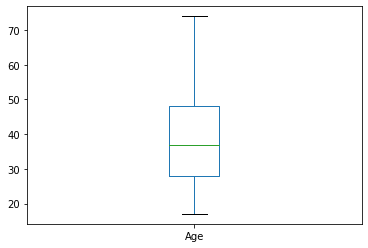

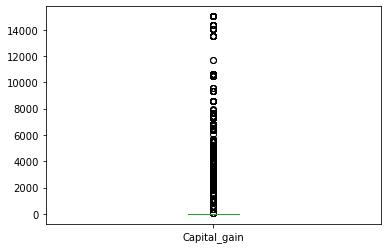

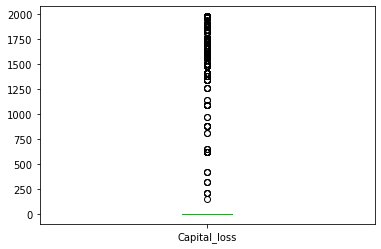

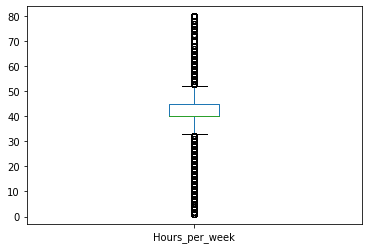

In [84]:
for i in AVN:
    
    q4=census[i].quantile(0.99)
    census[i][census[i]>q4]=q4
    census[i].plot.box()
    plt.show()

Outlier are removed from age column.

#### Apply hard capping

In [85]:
AV=['Capital_gain','Hours_per_week']
AV

['Capital_gain', 'Hours_per_week']

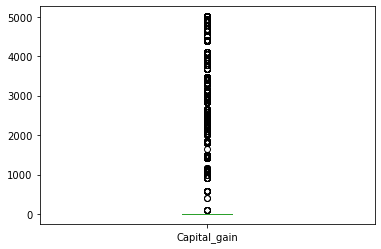

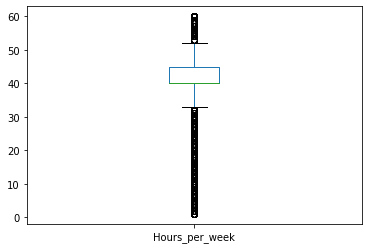

In [86]:
for i in AV:
    
    q4=census[i].quantile(0.95)
    census[i][census[i]>q4]=q4
    census[i].plot.box()
    plt.show()

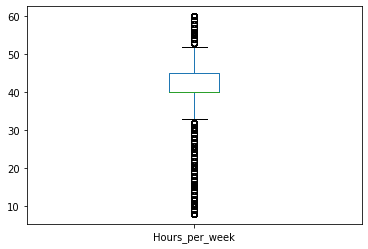

In [87]:
    q1=census['Hours_per_week'].quantile(0.01)
    census['Hours_per_week'][census['Hours_per_week']<q1]=q1
    census['Hours_per_week'].plot.box()
    plt.show()

We have eliminated outliers by soft capping for q1 in hours per week column.

### 

### Distribution Plot for skewness`

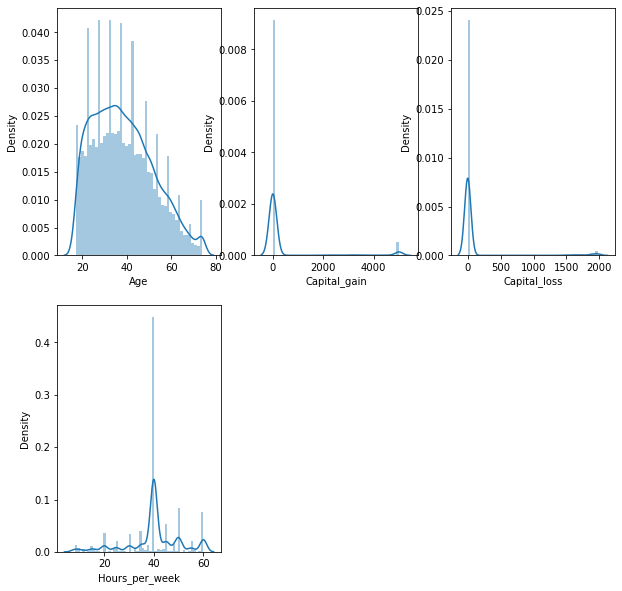

In [88]:
plt.figure(figsize=(10,10))
for index,col in enumerate(AVN):
    plt.subplot(ncols,nrows,index+1)
    sns.distplot(census[AVN[index]])

We will correct the skewness from age column.

## Data Spliting

In [89]:
census.head(2)

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Sex_ Female,Sex_ Male
0,50,5.0,9.0,13,2.0,3.0,0.0,2.0,0,0,13,38.0,0.0,0,1
1,38,3.0,11.0,9,0.0,5.0,1.0,2.0,0,0,40,38.0,0.0,0,1


In [90]:
x=census.drop('Income',axis=1)
y=census.iloc[:,12:13]

In [91]:
x.shape

(32560, 14)

In [92]:
y.shape

(32560, 1)

##### Check if there is imbalancing in Label.

In [93]:
y.value_counts()

Income
0.0       24719
1.0        7841
dtype: int64

0= <=50k

1=>50k

### IMBALANCING

In [94]:
import imblearn

In [95]:
from imblearn.over_sampling import SMOTE

In [96]:
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

##### we can see that oversampling is succesfully applied for the target.

In [97]:
y_over.value_counts()

Income
1.0       24719
0.0       24719
dtype: int64

In [98]:
x_over.shape

(49438, 14)

In [99]:
y_over.shape

(49438, 1)

##### Can be confirmed that oversampling is succesfully applied to avoid imbalance

## Skewness

In [100]:
x_over.skew()

Age               0.316502
Workclass        -0.018216
Education        -0.961810
Education_num    -0.378414
Marital_status   -0.779381
Occupation        0.003684
Relationship      1.171610
Race             -2.867240
Capital_gain      2.370940
Capital_loss      3.573686
Hours_per_week   -0.637697
Native_country   -4.380374
Sex_ Female       1.176376
Sex_ Male        -0.997243
dtype: float64

Skewness of all the required columns is with in the limit -0.5 to 0.5.

## Scaling

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
scaler=MinMaxScaler()
x_over=pd.DataFrame(scaler.fit_transform(x_over),columns=x_over.columns)

In [103]:
x_over.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country,Sex_ Female,Sex_ Male
0,0.578947,0.714286,0.600000,0.800000,0.5,0.230769,0.0,1.0,0.0,0.0,0.096154,0.95,0.0,1.0
1,0.368421,0.428571,0.733333,0.533333,0.0,0.384615,0.2,1.0,0.0,0.0,0.615385,0.95,0.0,1.0
2,0.631579,0.428571,0.066667,0.400000,0.5,0.384615,0.0,0.5,0.0,0.0,0.615385,0.95,0.0,1.0
3,0.192982,0.428571,0.600000,0.800000,0.5,0.692308,1.0,0.5,0.0,0.0,0.615385,0.10,1.0,0.0
4,0.350877,0.428571,0.800000,0.866667,0.5,0.230769,1.0,1.0,0.0,0.0,0.615385,0.95,1.0,0.0


##### Data is ready after encoding,scaling and removing the skewness to run through model.

## Model Execution

In [104]:
#Best random_state for model execution.
maxAccu=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    LG=LogisticRegression()
    LG.fit(x_train,y_train)
    pred=LG.predict(x_test)
    ac=accuracy_score(y_test,pred)
    
    if ac>maxAccu:
        maxAccu=ac
        maxRS=i
        
print('Best Accuracy score is',maxAccu*100,'at random state',maxRS)

Best Accuracy score is 78.8700107874865 at random state 19


### Logistic Regression

In [105]:
    LG=LogisticRegression(random_state=39)
    LG.fit(x_train,y_train)
    LG.score(x_train,y_train)
    pred=LG.predict(x_test)
    print('The model is:',LG)
    print('Accuracy score:',accuracy_score(y_test,pred)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,pred))
    print('\n')
    print('classification report\n',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(LG,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: LogisticRegression(random_state=39)
Accuracy score: 77.50809061488673


confusion matrix 
 [[5774 1672]
 [1664 5722]]


classification report
               precision    recall  f1-score   support

         0.0       0.78      0.78      0.78      7446
         1.0       0.77      0.77      0.77      7386

    accuracy                           0.78     14832
   macro avg       0.78      0.78      0.78     14832
weighted avg       0.78      0.78      0.78     14832



cross validation score
cross val score [0.76365291 0.77366505 0.79014968 0.78648731 0.79285931]
cross val score mean: 78.13628508619897


Difference between accuracy score and cross val mean score : -0.006281944713122378




### Hyper parameter tunning using GridSearchCV for Logistic Regression

In [106]:
from sklearn.model_selection import GridSearchCV

params = { 'penalty': ['l2'],'tol':[0.0001,0.001,0.01],'multi_class' : ['auto', 'ovr', 'multinomial']}

grid_search_LG=GridSearchCV(estimator=LG,param_grid=params,cv=7,n_jobs=-1,verbose=1)

grid_search_LG.fit(x_train,y_train)

Fitting 7 folds for each of 9 candidates, totalling 63 fits


GridSearchCV(cv=7, estimator=LogisticRegression(random_state=39), n_jobs=-1,
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l2'], 'tol': [0.0001, 0.001, 0.01]},
             verbose=1)

In [107]:
Best_LG=grid_search_LG.best_estimator_
Best_LG

LogisticRegression(random_state=39)

In [108]:
grid_search_LG.best_score_

0.7845460674247681

In [109]:
def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(x_test)))

In [110]:
evaluate_model(Best_LG)

Train Accuracy : 0.7847772062648096
Train Confusion Matrix:
[[13559  3714]
 [ 3734 13599]]
--------------------------------------------------
Test Accuracy : 0.7750809061488673
Test Confusion Matrix:
[[5774 1672]
 [1664 5722]]


In [111]:
    grid_search_LG.score(x_train,y_train)
    predl=grid_search_LG.predict(x_test)
    print('The model is:',LG)
    print('Accuracy score:',accuracy_score(y_test,predl)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predl))
    print('\n')
    print('classification report\n',classification_report(y_test,predl))
    print('\n')
    print('cross validation score')
    score=cross_val_score(grid_search_LG,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predl)-(score.mean())))
    print('\n')

The model is: LogisticRegression(random_state=39)
Accuracy score: 77.50809061488673


confusion matrix 
 [[5774 1672]
 [1664 5722]]


classification report
               precision    recall  f1-score   support

         0.0       0.78      0.78      0.78      7446
         1.0       0.77      0.77      0.77      7386

    accuracy                           0.78     14832
   macro avg       0.78      0.78      0.78     14832
weighted avg       0.78      0.78      0.78     14832



cross validation score
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
cross val score [0.76365291 0.77366505 0.79014968 0.78648731 0.79285931]
cross val score mean: 78.13628508619897


Difference between accuracy score and cross val mean score : -0.006281944713

Difference between accuracy score and cross val mean score : -0.005540237771405221 at cross fold 7.
    
Difference between accuracy score and cross val mean score : -0.004993821448932456 at cross fold 3.   
    
Difference between accuracy score and cross val mean score : -0.0027220189271454087 at cross fold 5.    

### AUC ROC CURVE FOR LOGISTIC REGRESSION

In [112]:
from sklearn.metrics import plot_roc_curve

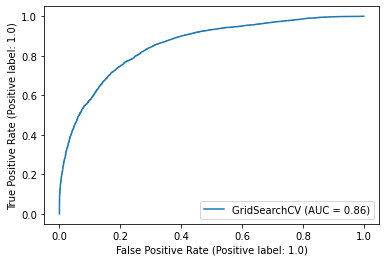

In [113]:
plot_roc_curve(grid_search_LG,x_test, y_test)
plt.show()

In [114]:
auc_score_LG=roc_auc_score(y_test,predl)
auc_score_LG*100

77.5079407368035

#### Logistic Regression: The best accuracy score we get for this model is 78.12%.

## Random Forest Classifier

In [115]:
rf=RandomForestClassifier(n_estimators=150)

In [116]:
    rf.fit(x_train,y_train)
    rf.score(x_train,y_train)
    pred=rf.predict(x_test)
    print('The model is:',rf)
    print('Accuracy score:',accuracy_score(y_test,pred))
    print('confusion matrix \n',confusion_matrix(y_test,pred))
    print('classification report \n',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(rf,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: RandomForestClassifier(n_estimators=150)
Accuracy score: 0.8907766990291263
confusion matrix 
 [[6593  853]
 [ 767 6619]]
classification report 
               precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      7446
         1.0       0.89      0.90      0.89      7386

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832



cross validation score
cross val score [0.80622977 0.8601335  0.92849919 0.93102053 0.93081825]
cross val score mean: 0.8913402475481027
Best score: -0.0005635485189764422




## HYPER PARAMETER TUNNING FOR RANDOM FOREST CLASSIFIER

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
params = {
    'max_depth': [5,10,20,30],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [10,20,30,50,100,150]
}

In [119]:
grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search_rf.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=150),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [10, 20, 30, 50, 100, 150]},
             scoring='accuracy', verbose=1)

In [120]:
grid_search_rf.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_estimators=50)

In [121]:
rf_best=grid_search_rf.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_estimators=50)

In [122]:
grid_search_rf.best_score_

0.8824480857371597

In [123]:
def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(x_test)))

In [124]:
evaluate_model(rf_best)

Train Accuracy : 0.9032826677454776
Train Confusion Matrix:
[[15132  2141]
 [ 1206 16127]]
--------------------------------------------------
Test Accuracy : 0.8817421790722761
Test Confusion Matrix:
[[6366 1080]
 [ 674 6712]]


In [125]:
%%time    
    grid_search_rf.score(x_train,y_train)
    predr=grid_search_rf.predict(x_test)
    print('The model is:',rf)
    print('Accuracy score:',accuracy_score(y_test,predr)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predr))
    print('\n')
    print('classification report\n',classification_report(y_test,predr))
    print('\n')
    print('cross validation score')
    score=cross_val_score(grid_search_rf,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predr)-(score.mean())))
    print('\n')

The model is: RandomForestClassifier(n_estimators=150)
Accuracy score: 88.17421790722761


confusion matrix 
 [[6366 1080]
 [ 674 6712]]


classification report
               precision    recall  f1-score   support

         0.0       0.90      0.85      0.88      7446
         1.0       0.86      0.91      0.88      7386

    accuracy                           0.88     14832
   macro avg       0.88      0.88      0.88     14832
weighted avg       0.88      0.88      0.88     14832



cross validation score
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
cross val score [0.81765777 0.86114482 0.90746359 0.91119652 0.91190452]
cross val score mean: 88.18734446003596


Difference between accuracy score and cross val mean score : 

Difference between accuracy score and cross val mean score : -0.0028692433667311112 at CV=7 , Accuracy score:88.14724 and CVSM:88.4341.
            
Difference between accuracy score and cross val mean score : -0.00012446197588289465 at cv=5 , Accuracy score: 88.1472 and CVSM:88.19947.           

### AUC ROC CURVE FOR RF

In [126]:
from sklearn.metrics import plot_roc_curve

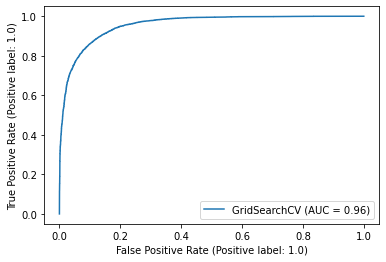

In [127]:
plot_roc_curve(grid_search_rf,x_test, y_test)
plt.show()

In [128]:
auc_score=roc_auc_score(y_test,predr)
auc_score

0.881850978821138

#### Random Forest Classifier: The best accuracy score we get for this model is 88.07%.

## ADA BOOST CLASSIFIER

In [129]:
ad=AdaBoostClassifier(n_estimators=150)

In [130]:
    ad.fit(x_train,y_train)
    ad.score(x_train,y_train)
    pred_y=ad.predict(x_test)
    print('The model is:',ad)
    print('Accuracy score:',accuracy_score(y_test,pred_y))
    print('confusion matrix \n',confusion_matrix(y_test,pred_y))
    print('classification report \n',classification_report(y_test,pred_y))
    print('\n')
    print('cross validation score')
    score=cross_val_score(ad,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred_y)-(score.mean())))
    print('\n')

The model is: AdaBoostClassifier(n_estimators=150)
Accuracy score: 0.8714940668824164
confusion matrix 
 [[6383 1063]
 [ 843 6543]]
classification report 
               precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      7446
         1.0       0.86      0.89      0.87      7386

    accuracy                           0.87     14832
   macro avg       0.87      0.87      0.87     14832
weighted avg       0.87      0.87      0.87     14832



cross validation score
cross val score [0.8016788  0.8539644  0.89815939 0.9000708  0.89855366]
cross val score mean: 0.8704854090707193
Best score: 0.0010086578116971223




### HYPER PARAMETER TUNNING FOR ADA BOOST CLASSIFIER

In [131]:
paramss = {
     
    'learning_rate': [0.5,0.8,0.9],
    'n_estimators': [50,150]
}


In [132]:
ada_HT = GridSearchCV(
                           estimator=ad,
                           param_grid=paramss,
                           
                           )

ada_HT.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(n_estimators=150),
             param_grid={'learning_rate': [0.5, 0.8, 0.9],
                         'n_estimators': [50, 150]})

In [133]:
ada_HT.best_estimator_

AdaBoostClassifier(learning_rate=0.9, n_estimators=150)

In [134]:
ad_best=ada_HT.best_estimator_
ad_best

AdaBoostClassifier(learning_rate=0.9, n_estimators=150)

In [135]:
evaluate_model(ad_best)

Train Accuracy : 0.8747616020343293
Train Confusion Matrix:
[[14763  2510]
 [ 1824 15509]]
--------------------------------------------------
Test Accuracy : 0.8726402373247033
Test Confusion Matrix:
[[6364 1082]
 [ 807 6579]]


In [136]:
    ada_HT.score(x_train,y_train)
    preda=ada_HT.predict(x_test)
    print('The model is:',ad)
    print('Accuracy score:',accuracy_score(y_test,preda)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,preda))
    print('\n')
    print('classification report\n',classification_report(y_test,preda))
    print('\n')
    print('cross validation score')
    score=cross_val_score(ada_HT,x_over,y_over,cv=7)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,preda)-(score.mean())))
    print('\n')

The model is: AdaBoostClassifier(n_estimators=150)
Accuracy score: 87.26402373247033


confusion matrix 
 [[6364 1082]
 [ 807 6579]]


classification report
               precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      7446
         1.0       0.86      0.89      0.87      7386

    accuracy                           0.87     14832
   macro avg       0.87      0.87      0.87     14832
weighted avg       0.87      0.87      0.87     14832



cross validation score
cross val score [0.80872151 0.80999575 0.87696446 0.89437916 0.90314359 0.89549703
 0.89677145]
cross val score mean: 86.93532778880801


Difference between accuracy score and cross val mean score : 0.0032869594366231603




Difference between accuracy score and cross val mean score : 0.014061816637866653 at CV=3.  

Difference between accuracy score and cross val mean score : 0.0024240812210213347

### AUC ROC CURVE FOR AdaBoostClassifer

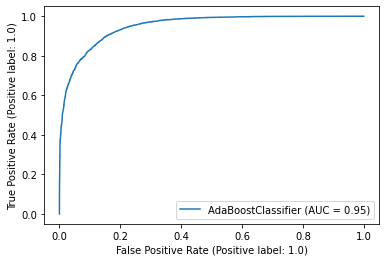

In [137]:
plot_roc_curve(ad_best,x_test, y_test)
plt.show()

In [138]:
auc_score_ad=roc_auc_score(y_test,preda)
auc_score_ad

0.8727131583523764

#### Ada Boost Classifier: The best accuracy score we get for this model is 85.72%

## KNNeighbors Classifier

In [139]:
KNN=KNeighborsClassifier(n_neighbors=2)

In [140]:
    KNN.fit(x_train,y_train)
    KNN.score(x_train,y_train)
    predk=KNN.predict(x_test)
    print('The model is:',KNN)
    print('Accuracy score:',accuracy_score(y_test,predk)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predk))
    print('\n')
    print('classification report\n',classification_report(y_test,predk))
    print('\n')
    print('cross validation score')
    score=cross_val_score(KNN,x_over,y_over,cv=3)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predk)-(score.mean())))
    print('\n')

The model is: KNeighborsClassifier(n_neighbors=2)
Accuracy score: 83.89967637540452


confusion matrix 
 [[6675  771]
 [1617 5769]]


classification report
               precision    recall  f1-score   support

         0.0       0.80      0.90      0.85      7446
         1.0       0.88      0.78      0.83      7386

    accuracy                           0.84     14832
   macro avg       0.84      0.84      0.84     14832
weighted avg       0.84      0.84      0.84     14832



cross validation score
cross val score [0.78968447 0.86686085 0.86977365]
cross val score mean: 84.2106323513441


Difference between accuracy score and cross val mean score : -0.0031095597593957525




##### Hyper parameter tunning using GridSearchCV for KNNeighbors Classifier

In [141]:
params = { 'weights':['distance','uniform'],'leaf_size':[30,60], 'p':[4,5]}

In [142]:
KNC=GridSearchCV(estimator=KNN,param_grid=params,n_jobs=-1)

KNC.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=2), n_jobs=-1,
             param_grid={'leaf_size': [30, 60], 'p': [4, 5],
                         'weights': ['distance', 'uniform']})

In [143]:
KN=KNC.best_estimator_
KN

KNeighborsClassifier(n_neighbors=2, p=4, weights='distance')

In [144]:
KNC.best_score_

0.8497948720068201

In [145]:
evaluate_model(KN)

Train Accuracy : 0.9745997803849044
Train Confusion Matrix:
[[17115   158]
 [  721 16612]]
--------------------------------------------------
Test Accuracy : 0.8505933117583603
Test Confusion Matrix:
[[6290 1156]
 [1060 6326]]


In [146]:
%%time
    KNC.score(x_train,y_train)
    predn=KNC.predict(x_test)
    print('The model is:',KNN)
    print('Accuracy score:',accuracy_score(y_test,predn)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predn))
    print('\n')
    print('classification report\n',classification_report(y_test,predn))
    print('\n')
    print('cross validation score')
    score=cross_val_score(KNC,x_over,y_over,cv=7)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predn)-(score.mean())))
    print('\n')

The model is: KNeighborsClassifier(n_neighbors=2)
Accuracy score: 85.05933117583602


confusion matrix 
 [[6290 1156]
 [1060 6326]]


classification report
               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      7446
         1.0       0.85      0.86      0.85      7386

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832



cross validation score
cross val score [0.81141158 0.81509274 0.86068243 0.88361886 0.8845936  0.88898329
 0.88161994]
cross val score mean: 86.0857490682391


Difference between accuracy score and cross val mean score : -0.010264178924030642


Wall time: 12min 58s


Difference between accuracy score and cross val mean score : -0.005840704655159956 at CV:5.
        
Difference between accuracy score and cross val mean score : -0.00905734769550592 at CV: 7.        

#### AUC ROC CURVE FOR KNeighbors Classifier

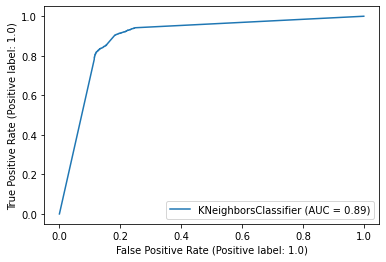

In [147]:
plot_roc_curve(KN,x_test, y_test)
plt.show()

In [148]:
auc_score_KN=roc_auc_score(y_test,predn)
auc_score_KN*100

85.06170503989405

#### KNeighbors Classifier : The best performance of this model is 86.26%.

## DecissionTree Classifier

In [149]:
    DTC=DecisionTreeClassifier(random_state=75)
    DTC.fit(x_train,y_train)
    DTC.score(x_train,y_train)
    pred=DTC.predict(x_test)
    print('The model is:',DTC)
    print('Accuracy score:',accuracy_score(y_test,pred)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,pred))
    print('\n')
    print('classification report\n',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(DTC,x,y,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,pred)-(score.mean()))*100)
    print('\n')

The model is: DecisionTreeClassifier(random_state=75)
Accuracy score: 85.70658036677455


confusion matrix 
 [[6344 1102]
 [1018 6368]]


classification report
               precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      7446
         1.0       0.85      0.86      0.86      7386

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832



cross validation score
cross val score [0.80743243 0.80942875 0.79929361 0.807586   0.81941032]
cross val score mean: 80.86302211302211


Difference between accuracy score and cross val mean score : 4.843558253752434




#### Hyper parameter tunning using GridSearchCV for Decision Tree Classifier

In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
params = { 'criterion': ['gini','entropy'],'max_depth': [2,3,5,10,20],'min_samples_leaf':[5,10,20,50,100]}

In [152]:
grid_search_DTC=GridSearchCV(estimator=DTC,param_grid=params,cv=3,n_jobs=-1,verbose=1,scoring='accuracy')

grid_search_DTC.fit(x_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=75), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [153]:
Best_dtc=grid_search_DTC.best_estimator_
Best_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       random_state=75)

In [154]:
grid_search_DTC.best_score_

0.8610357034140601

In [155]:
def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(x_test)))

In [156]:
evaluate_model(Best_dtc)

Train Accuracy : 0.8955094492284575
Train Confusion Matrix:
[[15441  1832]
 [ 1784 15549]]
--------------------------------------------------
Test Accuracy : 0.8656283710895362
Test Confusion Matrix:
[[6460  986]
 [1007 6379]]


In [157]:
    grid_search_DTC.score(x_train,y_train)
    predt=grid_search_DTC.predict(x_test)
    print('The model is:',DTC)
    print('Accuracy score:',accuracy_score(y_test,predt)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predt))
    print('\n')
    print('classification report\n',classification_report(y_test,predt))
    print('\n')
    print('cross validation score')
    score=cross_val_score(grid_search_DTC,x_over,y_over,cv=3)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predt)-(score.mean())))
    print('\n')

The model is: DecisionTreeClassifier(random_state=75)
Accuracy score: 86.56283710895362


confusion matrix 
 [[6460  986]
 [1007 6379]]


classification report
               precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      7446
         1.0       0.87      0.86      0.86      7386

    accuracy                           0.87     14832
   macro avg       0.87      0.87      0.87     14832
weighted avg       0.87      0.87      0.87     14832



cross validation score
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
cross val score [0.76832524 0.87025912 0.87268645]
cross val score mean: 83.70902699346094


Difference between accuracy score and cross val mean score : 0.02853810115492683




Difference between accuracy score and cross val mean score : 0.000879964696407054 at CV:7.
        
Difference between accuracy score and cross val mean score : 0.000879964696407054 at CV:5. 
        
Difference between accuracy score and cross val mean score : 0.0235555117614632  at CV:3.        

#### AUC ROC CURVE FOR DTC

In [158]:
y_pred_prob=DTC.predict_proba(x_test)[:,-1]

In [159]:
y_pred_prob

array([0., 0., 1., ..., 0., 1., 1.])

In [160]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [161]:
fpr

array([0.        , 0.12664518, 0.12664518, 0.12691378, 0.12718238,
       0.12758528, 0.12812248, 0.12865968, 0.12892828, 0.12933118,
       0.12959979, 0.13053989, 0.13107709, 0.13201719, 0.13215149,
       0.13215149, 0.1353747 , 0.1359119 , 0.1363148 , 0.136852  ,
       0.1369863 , 0.14128391, 0.14141821, 0.14235831, 0.14410422,
       0.14423852, 0.14504432, 0.14571582, 0.14732742, 0.14799893,
       0.15766855, 0.15860865, 0.15874295, 0.16008595, 0.16089175,
       0.16102605, 0.16518936, 0.16559226, 0.16599517, 0.16639807,
       0.16921837, 0.17002417, 0.17029277, 0.17123288, 0.17136718,
       1.        ])

In [162]:
tpr

array([0.        , 0.81153534, 0.81275386, 0.81383699, 0.81464934,
       0.81586786, 0.81816951, 0.8214189 , 0.82263742, 0.82466829,
       0.82751151, 0.8307609 , 0.83157325, 0.83428107, 0.83482264,
       0.83509342, 0.84253994, 0.84294611, 0.84430003, 0.84511237,
       0.84578933, 0.85499594, 0.85526672, 0.85594368, 0.85810994,
       0.8586515 , 0.85987002, 0.86081776, 0.86135933, 0.86217168,
       0.87395072, 0.87462767, 0.87462767, 0.87652315, 0.87706472,
       0.87720011, 0.88099106, 0.88099106, 0.8819388 , 0.8819388 ,
       0.88220959, 0.88261576, 0.88261576, 0.88315732, 0.88315732,
       1.        ])

In [163]:
thresholds

array([2.        , 1.        , 0.92307692, 0.91666667, 0.90909091,
       0.9       , 0.88888889, 0.875     , 0.86666667, 0.85714286,
       0.83333333, 0.8       , 0.78787879, 0.7826087 , 0.77777778,
       0.76190476, 0.75      , 0.72727273, 0.71428571, 0.7       ,
       0.6875    , 0.66666667, 0.63636364, 0.625     , 0.6       ,
       0.58823529, 0.57142857, 0.55      , 0.54545455, 0.52941176,
       0.5       , 0.42857143, 0.41666667, 0.4       , 0.375     ,
       0.36363636, 0.33333333, 0.3       , 0.28571429, 0.26666667,
       0.25      , 0.2       , 0.16666667, 0.15384615, 0.11111111,
       0.        ])

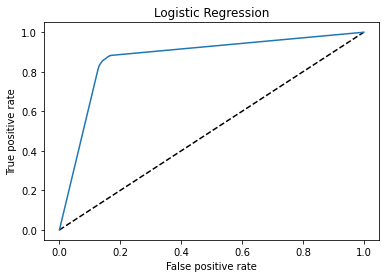

In [164]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [165]:
auc_score=roc_auc_score(y_test,grid_search_DTC.predict(x_test))

In [166]:
auc_score

0.8656204444543361

In [167]:
from sklearn.metrics import plot_roc_curve

<Figure size 1080x1080 with 0 Axes>

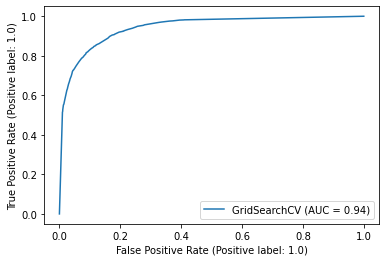

In [168]:
plt.figure(figsize=(15,15))
plot_roc_curve(grid_search_DTC,x_test, y_test)
plt.show()

#### Decision Tree Clasisifer : The best performance of this model is with 83.94% accuracy.

#### Conclusion :      

#### We have run most of the models with hyper tunning above and we can conclude that Random Forest Classifier is best performing model with acuracy score of 88.07% and also f1 and recall scor eare good compared to other models   

classification report

               precision    recall  f1-score   support

         0.0       0.90      0.85      0.88      7446
         1.0       0.86      0.91      0.88      7386

## JOBLIB

In [169]:
joblib.dump(grid_search_rf,'census.obj')

['census.obj']